# Detect Cut in the video

In [23]:
from scenedetect import detect, ContentDetector,ThresholdDetector,AdaptiveDetector,open_video,StatsManager,SceneManager
import numpy as np
from MyDetector import MyDetector as MyDetector1
import os
import time 
import shutil



In [31]:

root_path = '/home/guangyi.liu/repo/video_process/mp4_noncut'
# root_path = '/home/guangyi.liu/repo/video_process/test'
copy_path = os.path.join(root_path,'wrong')
os.makedirs(copy_path, exist_ok=True)
files = os.listdir(root_path)
files.sort()

cut_list = []
static_list =[]
results_list = {'mp4':[],'de_mean':[],'de_std':[],'dl_mean':[],'dl_std':[]}
x_list = []
y = []
cnt_ = 0
start_t = time.time()
for mp4_file in files:
    if '.mp4' in mp4_file[-4:]:
        mp4file = os.path.join(root_path, mp4_file)
        
        video = open_video(mp4file)
        video.seek(1)
        stats_manager = StatsManager()
        scene_manager = SceneManager(stats_manager)
        scene_manager.auto_downscale=True
        scene_manager.add_detector(ContentDetector(threshold=27))
        scene_manager.detect_scenes(video=video)
        frame_keys = stats_manager._frame_metrics.keys()
        delta_edges = []
        delta_lums = []
        for key in frame_keys:
            delta_edges.append(stats_manager._frame_metrics[key]['delta_edges'])
            delta_lums.append(stats_manager._frame_metrics[key]['delta_lum'])
        de_mean = np.mean(delta_edges)
        de_std = np.std(delta_edges)
        dl_mean = np.mean(delta_lums)
        dl_std = np.std(delta_lums)
        de_upper_bound = max(de_mean + 4.7 * de_std, 3.5* de_mean) + 2
        dl_upper_bound = max(dl_mean + 5* dl_std, 3.* dl_mean)+ 1
        total_cut_de = np.sum(np.array(delta_edges) > de_upper_bound )
        total_cut_dl = np.sum(np.array(delta_lums) > dl_upper_bound  )
        # results_list['mp4'].append(mp4_file)
        # results_list['de_mean'].append(round(de_mean,2))
        # results_list['dl_mean'].append(round(dl_mean,2))
        # results_list['de_std'].append(round(de_std,2))
        # results_list['dl_std'].append(round(dl_std,2))
        print(f'{mp4_file}\n\t{round(de_mean,2)}\t{round(de_std,2)}\t{round(de_upper_bound,2)}\t{round(np.max(delta_edges),2)}\t\t{round(dl_mean,2)}\t{round(dl_std,2)}\t{round(dl_upper_bound,2)}\t{round(np.max(delta_lums),2)}\t{total_cut_de> 0 or total_cut_dl >0 or (dl_mean > 9 and dl_std>9) or (dl_mean< dl_std and de_mean < de_std)}')
        x_list.append([de_mean,de_std,np.max(delta_edges), dl_mean, dl_std, np.max(delta_lums)])
        y.append(0)
        if dl_mean < .5 and dl_std < 0.5 :
            static_list.append(mp4_file)
        elif de_mean < 0.6 and de_std < 0.6:
            static_list.append(mp4_file)
        if total_cut_de> 0 or total_cut_dl >0 or (dl_mean > 9 and dl_std>9) or (dl_mean< dl_std and de_mean < de_std):
            cut_list.append(mp4_file)
            wrong_mp4file = os.path.join(copy_path, mp4_file)
            # shutil.copy(mp4file, copy_path)
            # shutil.copy(mp4file+'.csv', copy_path)
        stats_manager.save_to_csv(f'{root_path}/{mp4_file}.csv')
        cnt_ += 1 
print(len(cut_list),cut_list)
print(len(cut_list)/cnt_)
print(f'time used: {time.time() - start_t}')

492_1724043851.mp4
	37.35	16.09	132.71	74.07		13.3	6.06	44.57	42.95	False
493_1724043857.mp4
	13.79	5.91	50.27	61.04		6.18	3.51	24.75	30.69	True
496_1724043904.mp4
	12.06	4.36	44.21	25.47		3.28	1.47	11.64	11.78	True
498_1724044040.mp4
	31.74	25.79	154.95	88.51		13.19	11.38	71.09	38.18	True
499_1724044109.mp4
	5.02	5.35	32.17	17.61		1.46	1.49	9.9	5.25	True
> /tmp/ipykernel_2871068/2909945476.py(50)<module>()
     49             import ipdb;ipdb.set_trace()
---> 50         if dl_mean < .5 and dl_std < 0.5 :
     51             static_list.append(mp4_file)



ipdb>  total_cut_de


0


ipdb>  total_cut_dl


0


ipdb>  q


In [35]:

root_path = '/home/guangyi.liu/repo/video_process/mp4_cut'
copy_path = os.path.join(root_path,'wrong')
os.makedirs(copy_path, exist_ok=True)
files = os.listdir(root_path)
files.sort()

cut_list = []
static_list =[]
results_list = {'mp4':[],'de_mean':[],'de_std':[],'dl_mean':[],'dl_std':[]}
x_list = []
y = []
cnt_ = 0
start_t = time.time()
for mp4_file in files:
    if '.mp4' in mp4_file[-4:]:
        mp4file = os.path.join(root_path, mp4_file)
        
        video = open_video(mp4file)
        video.seek(1)
        stats_manager = StatsManager()
        scene_manager = SceneManager(stats_manager)
        scene_manager.auto_downscale=True
        scene_manager.add_detector(ContentDetector(threshold=27))
        scene_manager.detect_scenes(video=video)
        frame_keys = stats_manager._frame_metrics.keys()
        delta_edges = []
        delta_lums = []
        for key in frame_keys:
            delta_edges.append(stats_manager._frame_metrics[key]['delta_edges'])
            delta_lums.append(stats_manager._frame_metrics[key]['delta_lum'])
        de_mean = np.mean(delta_edges)
        de_std = np.std(delta_edges)
        dl_mean = np.mean(delta_lums)
        dl_std = np.std(delta_lums)
        de_upper_bound = max(de_mean + 4.7 * de_std, 3.5* de_mean) + 2
        dl_upper_bound = max(dl_mean + 5* dl_std, 3.* dl_mean)+ 1
        total_cut_de = np.sum(np.array(delta_edges) > de_upper_bound )
        total_cut_dl = np.sum(np.array(delta_lums) > dl_upper_bound  )
        # results_list['mp4'].append(mp4_file)
        # results_list['de_mean'].append(round(de_mean,2))
        # results_list['dl_mean'].append(round(dl_mean,2))
        # results_list['de_std'].append(round(de_std,2))
        # results_list['dl_std'].append(round(dl_std,2))
        print(f'{mp4_file}\n\t{round(de_mean,2)}\t{round(de_std,2)}\t{round(de_upper_bound,2)}\t{round(np.max(delta_edges),2)}\t\t{round(dl_mean,2)}\t{round(dl_std,2)}\t{round(dl_upper_bound,2)}\t{round(np.max(delta_lums),2)}\t{total_cut_de> 0 or total_cut_dl >0 or (dl_mean > 9 and dl_std>9) or (dl_mean< dl_std and de_mean < de_std)}')
        x_list.append([de_mean,de_std,np.max(delta_edges), dl_mean, dl_std, np.max(delta_lums)])
        y.append(0)
        if dl_mean < .5 and dl_std < 0.5 :
            static_list.append(mp4_file)
        elif de_mean < 0.6 and de_std < 0.6:
            static_list.append(mp4_file)
        if total_cut_de> 0 or total_cut_dl >0 or (dl_mean > 9 and dl_std>9) or (dl_mean< dl_std and de_mean < de_std):
            cut_list.append(mp4_file)
        else:
            # wrong_mp4file = os.path.join(copy_path, mp4_file)
            shutil.copy(mp4file, copy_path)
            shutil.copy(mp4file+'.csv', copy_path)
        stats_manager.save_to_csv(f'{root_path}/{mp4_file}.csv')
        cnt_ += 1 
print(len(cut_list),cut_list)
print(len(cut_list)/cnt_)
print(f'time used: {time.time() - start_t}')

0000000_00004.mp4
	10.54	3.42	38.9	46.22		5.38	2.38	18.26	29.08	True
0000001_00004.mp4
	13.69	6.46	49.91	48.5		4.98	3.57	23.83	39.94	True
0000001_00009.mp4
	19.58	10.74	72.07	125.11		8.18	5.98	39.1	78.36	True
0000002_00004.mp4
	0.76	3.36	18.54	38.83		0.36	2.24	12.55	24.41	True
0000004_00004.mp4
	0.08	0.53	4.58	8.13		0.1	1.46	8.38	24.14	True
0000004_00009.mp4
	0.2	1.18	7.75	12.42		0.24	2.03	11.38	23.04	True
0000005_00004.mp4
	19.01	11.74	76.19	85.84		7.27	5.01	33.32	35.98	True
0000005_00009.mp4
	8.28	7.03	43.32	76.37		2.7	2.78	17.58	38.24	True
0000007_00009.mp4
	22.77	14.15	91.26	53.48		13.26	6.57	47.09	28.48	False
0000009_00004.mp4
	4.64	1.86	18.23	11.24		2.0	0.74	7.01	4.29	False
0000009_00009.mp4
	17.13	14.06	85.22	175.53		6.58	4.74	31.28	19.3	True
0000011_00009.mp4
	12.59	10.98	66.22	131.21		4.99	4.79	29.93	52.79	True
0000013_00009.mp4
	9.38	17.31	92.76	71.62		3.77	7.76	43.59	42.24	True
0000017_00004.mp4
	0.27	1.9	11.18	32.93		0.08	0.35	2.85	2.75	True
0000018_00004.mp4
	4.31	3.47	22.

[h264 @ 0x4cc1940] mmco: unref short failure
[h264 @ 0x4cc1940] mmco: unref short failure
[h264 @ 0x4cc1940] mmco: unref short failure
[h264 @ 0x4cc1940] mmco: unref short failure


0000029_00004.mp4
	5.7	13.48	71.08	135.61		3.16	6.38	36.08	58.33	True
0000029_00009.mp4
	22.5	26.68	149.89	111.76		9.56	10.92	65.18	44.17	True
0000030_00009.mp4
	20.46	27.86	153.43	118.87		13.81	20.56	117.62	87.59	True
0000036_00009.mp4
	8.98	12.37	69.12	80.34		3.1	5.49	31.53	28.68	True
0000039_00004.mp4
	3.63	6.81	37.65	63.37		1.07	0.46	4.37	2.76	True
0000043_00004.mp4
	0.39	1.78	10.78	28.12		0.1	0.67	4.46	9.57	True
0000045_00009.mp4
	8.65	8.96	52.74	40.89		3.38	4.51	26.92	26.5	True
0000046_00004.mp4
	7.1	8.6	49.52	60.61		2.11	2.86	17.39	16.58	True
0000049_00004.mp4
	42.29	16.58	150.0	82.18		37.71	19.47	136.08	91.41	True
0000049_00009.mp4
	34.0	17.31	121.0	114.95		4.8	4.34	27.47	26.64	False
0000050_00009.mp4
	13.58	19.51	107.26	124.95		4.49	9.91	55.03	61.33	True
0000052_00004.mp4
	15.82	21.32	118.02	216.76		3.77	1.18	12.3	6.72	True
0000052_00009.mp4
	23.38	10.63	83.83	71.33		15.25	4.12	46.75	25.37	False
0000054_00004.mp4
	6.62	6.5	39.17	64.57		1.39	1.29	8.83	10.79	True
0000058_00009.m

In [214]:
normal_cutoff


0.012

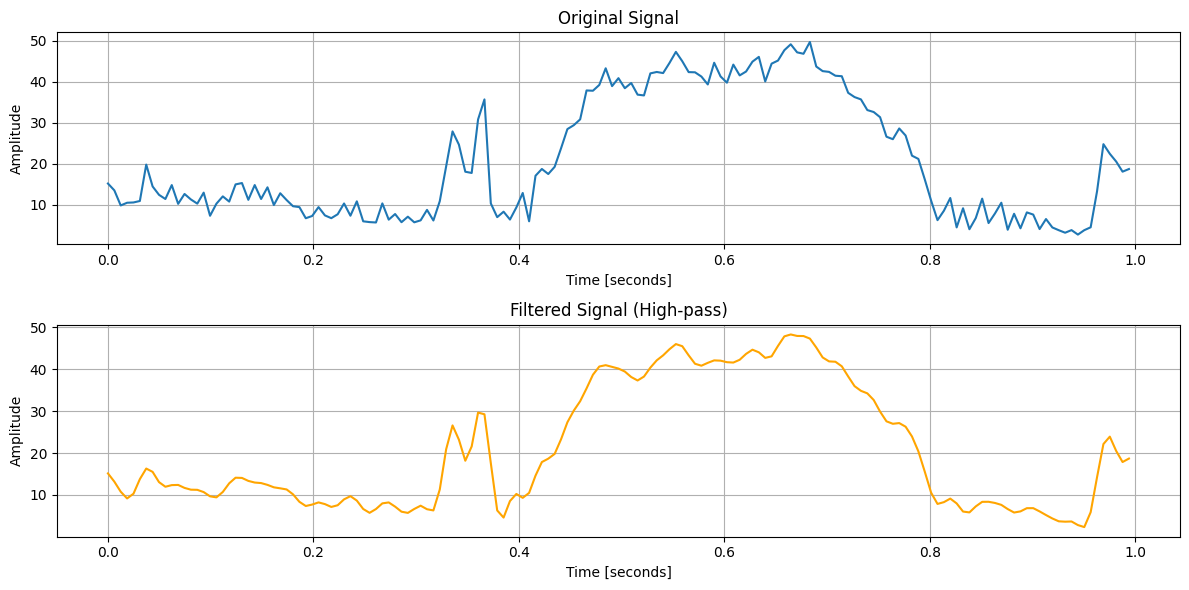

In [230]:
# from scipy.signal import butter, filtfilt

# # 设置滤波器参数
# cutoff = 0.1  # 截止频率（归一化频率，0.0 到 0.5 之间）
# order = 5     # 滤波器阶数
# b, a = butter(order, cutoff, btype='high', analog=False)
# signal = np.array(delta_edges)
# # 应用滤波器
# filtered_signal = filtfilt(b, a, signal)


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# 生成示例时间序列数据
np.random.seed(0)
t = np.linspace(0, 1, len(signal), endpoint=False)
# 包含低频和高频成分的信号
signal = np.array(delta_edges)
# 设计高通滤波器
cutoff = 3.0  # 截止频率（Hz）
fs = 500      # 采样频率（Hz）
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq *40
order = 5
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# 应用滤波器
filtered_signal = filtfilt(b, a, signal)

# 绘制原始信号和滤波后的信号
plt.figure(figsize=(12, 6))

# 原始信号
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.grid(True)

# 滤波后的信号
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered Signal', color='orange')
plt.title('Filtered Signal (High-pass)')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.grid(True)

# 展示图表
plt.tight_layout()
plt.show()


# 滑动窗口

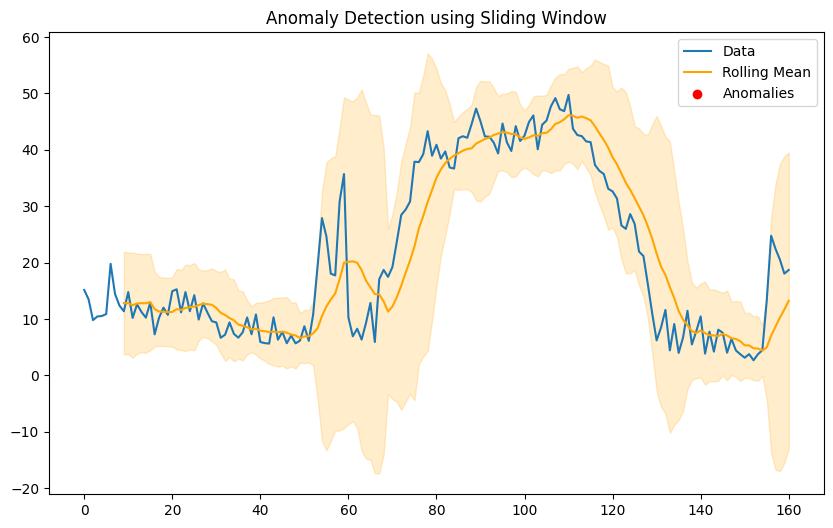

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 将数据转换为 pandas Series
data_series = pd.Series(signal)

# 定义滑动窗口大小
window_size = 10

# 计算滑动窗口均值和标准差
rolling_mean = data_series.rolling(window=window_size).mean()
rolling_std = data_series.rolling(window=window_size).std()

# 计算 Z-Score 或偏差值
z_scores = (data_series - rolling_mean) / rolling_std

# 定义异常检测的阈值
z_threshold = 3  # Z-Score 超过这个阈值的点被视为异常

# 标记异常点
anomalies = z_scores.abs() > z_threshold

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(data_series, label="Data")
plt.plot(rolling_mean, label="Rolling Mean", color='orange')
plt.scatter(data_series.index[anomalies], data_series[anomalies], color='red', label="Anomalies")
plt.fill_between(data_series.index, rolling_mean - z_threshold * rolling_std, rolling_mean + z_threshold * rolling_std, color='orange', alpha=0.2)
plt.title("Anomaly Detection using Sliding Window")
plt.legend()
plt.show()

# 傅里叶变化

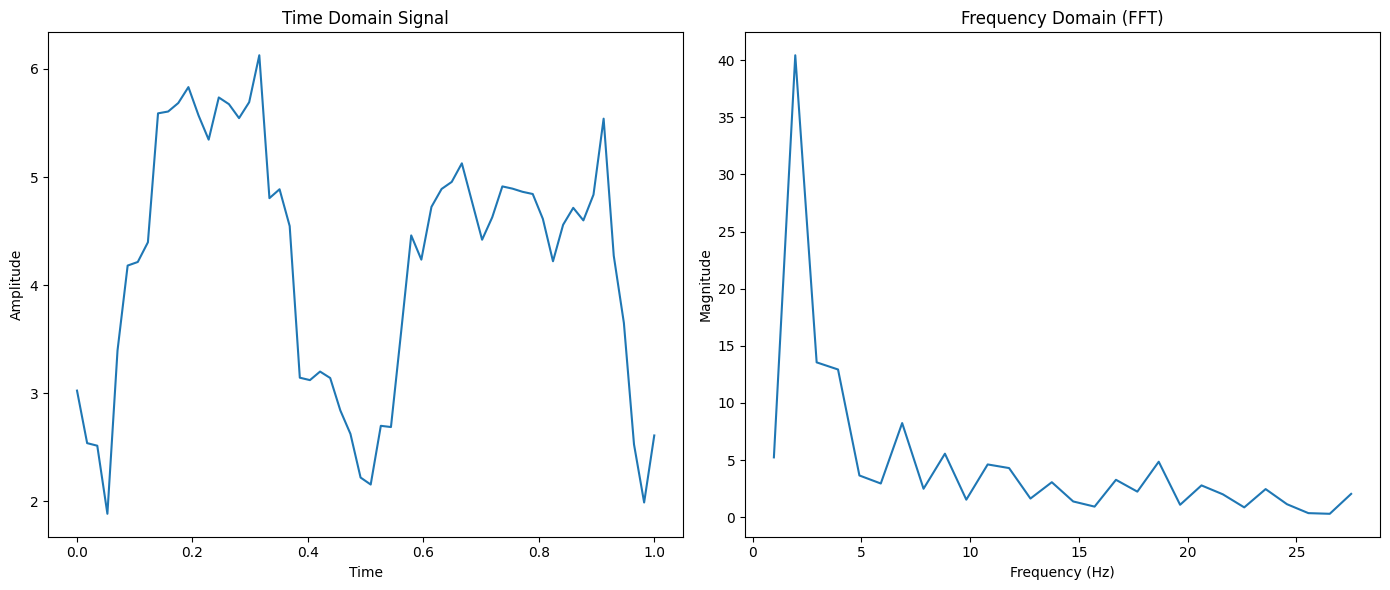

In [254]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
np.random.seed(42)


# 正常信号：包含两个频率成分
data = np.array(delta_lums)
t = np.linspace(0, 1, len(data))
n = len(data)
# 进行快速傅里叶变换 (FFT)
fft_result = np.fft.fft(data)
frequencies = np.fft.fftfreq(n, d=t[1] - t[0])

# 计算 FFT 幅度（取绝对值）
magnitude = np.abs(fft_result)

# 只取正频率部分进行分析
positive_freq_indices = frequencies > 0
frequencies = frequencies[positive_freq_indices]
magnitude = magnitude[positive_freq_indices]

# 可视化原始数据和频域中的幅度谱
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t, data)
plt.title("Time Domain Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(1, 2, 2)
plt.plot(frequencies, magnitude)
plt.title("Frequency Domain (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()


In [256]:
def fft(data):
    # 正常信号：包含两个频率成分
    t = np.linspace(0, 1, len(data))
    n = len(data)
    # 进行快速傅里叶变换 (FFT)
    fft_result = np.fft.fft(data)
    frequencies = np.fft.fftfreq(n, d=t[1] - t[0])
    
    # 计算 FFT 幅度（取绝对值）
    magnitude = np.abs(fft_result)
    
    # 只取正频率部分进行分析
    positive_freq_indices = frequencies > 0
    frequencies = frequencies[positive_freq_indices]
    magnitude = magnitude[positive_freq_indices]
    
    # 可视化原始数据和频域中的幅度谱
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(t, data)
    plt.title("Time Domain Signal")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    
    plt.subplot(1, 2, 2)
    plt.plot(frequencies, magnitude)
    plt.title("Frequency Domain (FFT)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    
    plt.tight_layout()
    plt.show()
    return magnitude


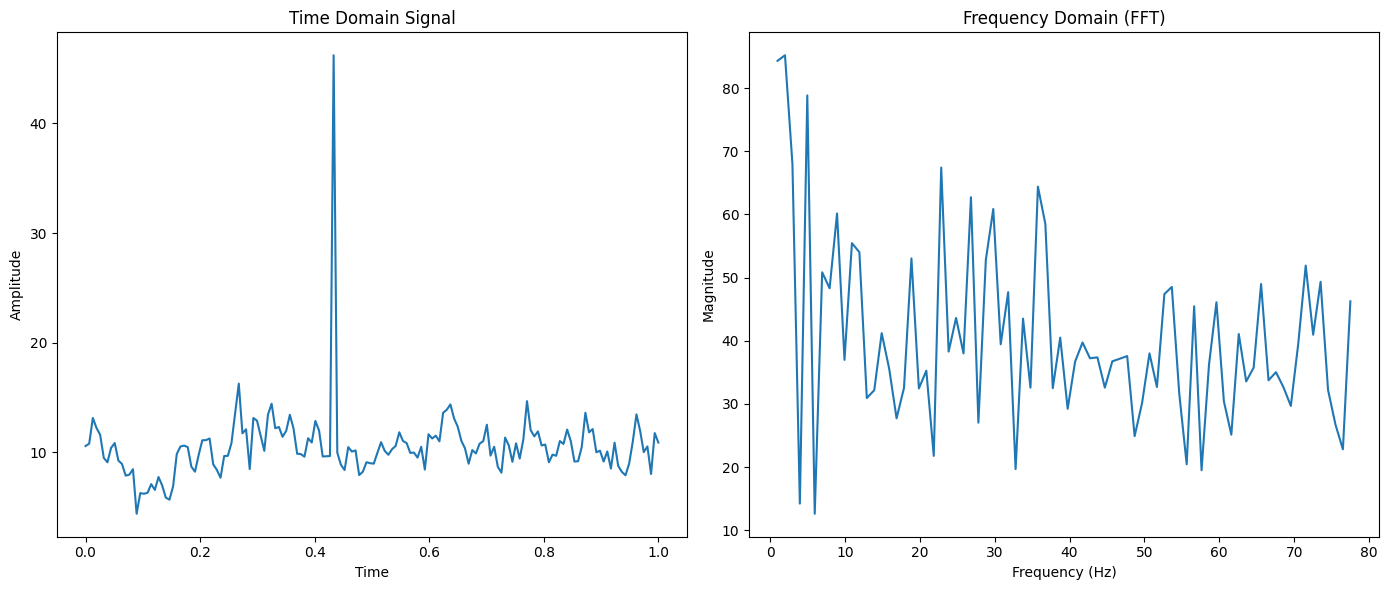

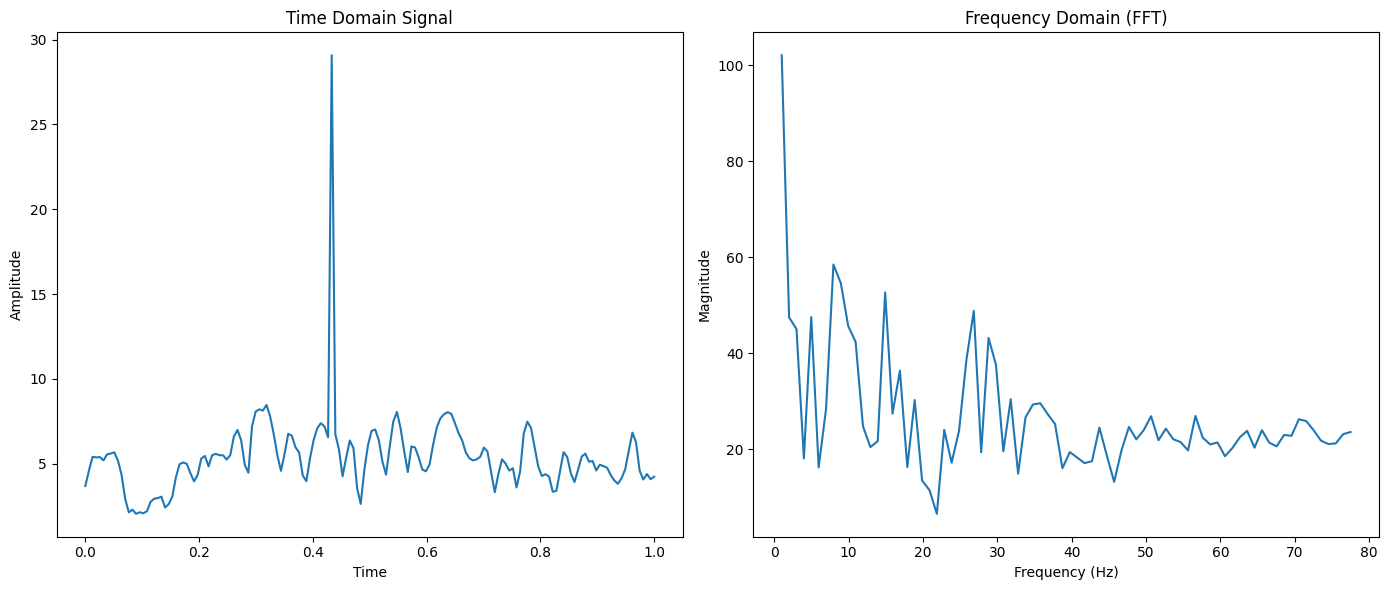

> /tmp/ipykernel_3306605/3309264687.py(41)<module>()
     39         import ipdb;ipdb.set_trace()
     40 
---> 41         total_num += 1



ipdb>  c


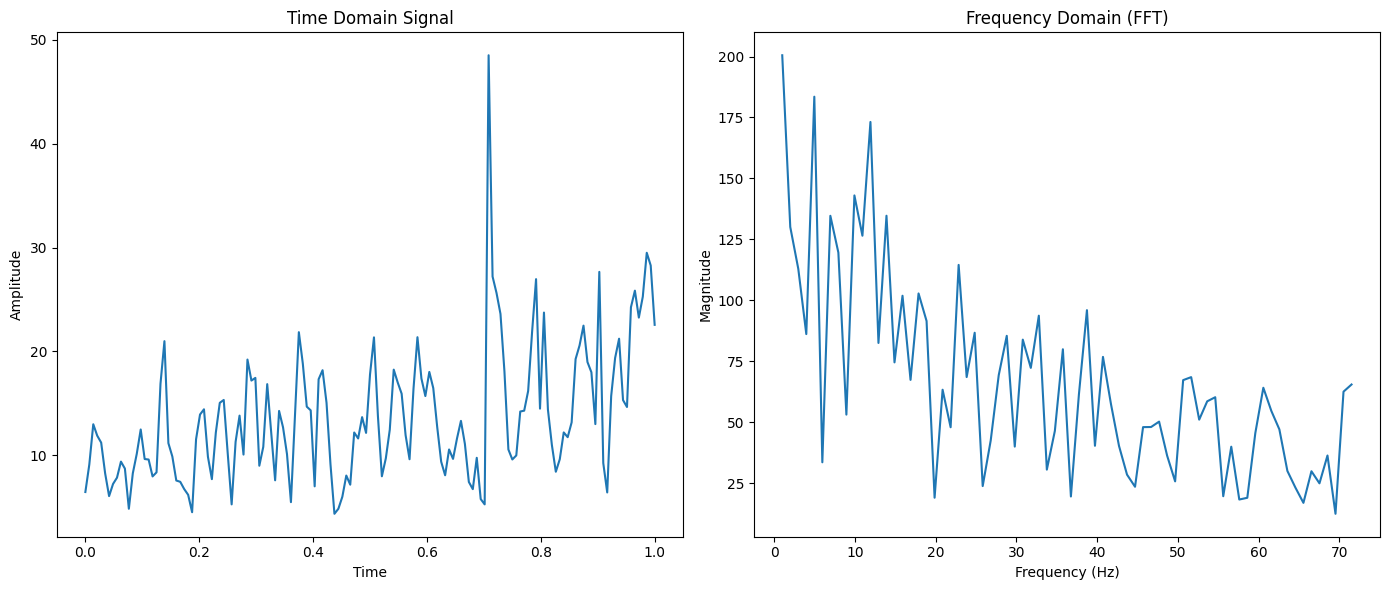

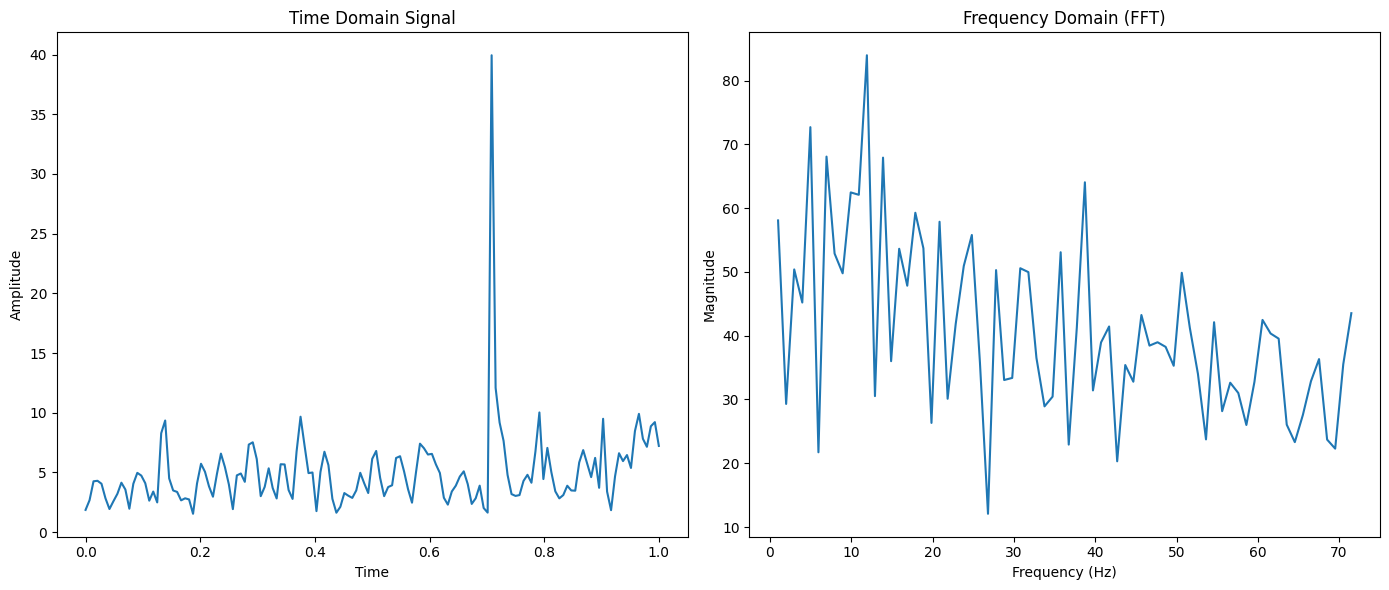

> /tmp/ipykernel_3306605/3309264687.py(41)<module>()
     39         import ipdb;ipdb.set_trace()
     40 
---> 41         total_num += 1



ipdb>  c


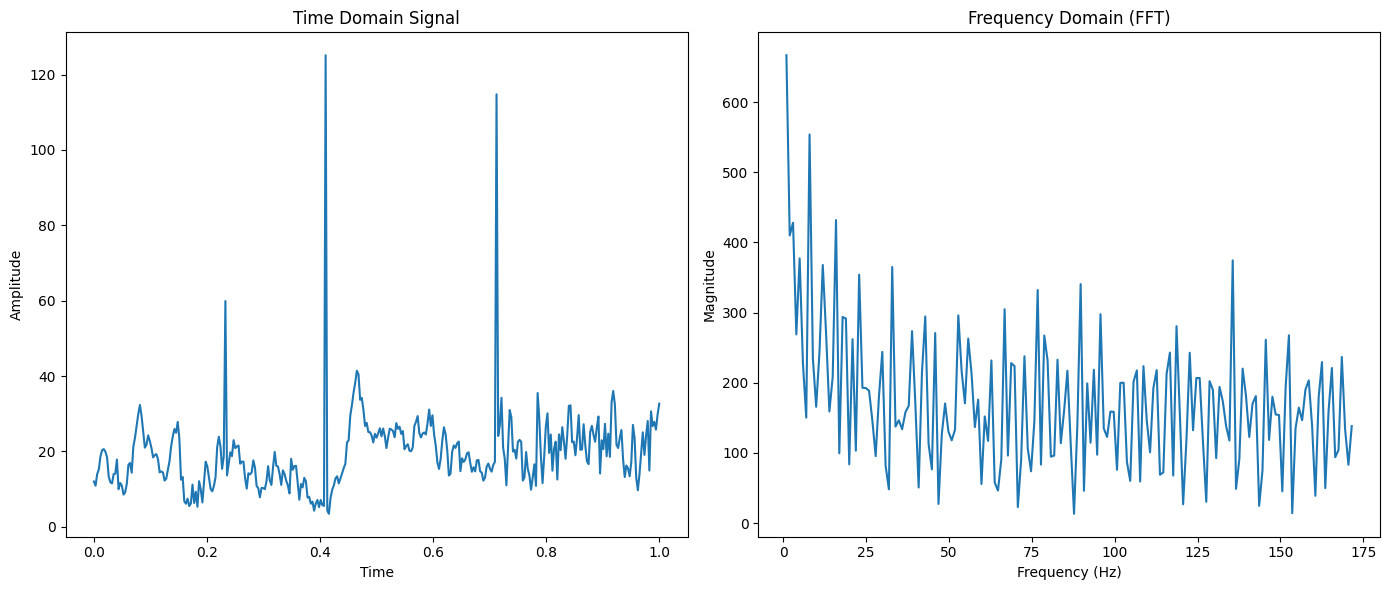

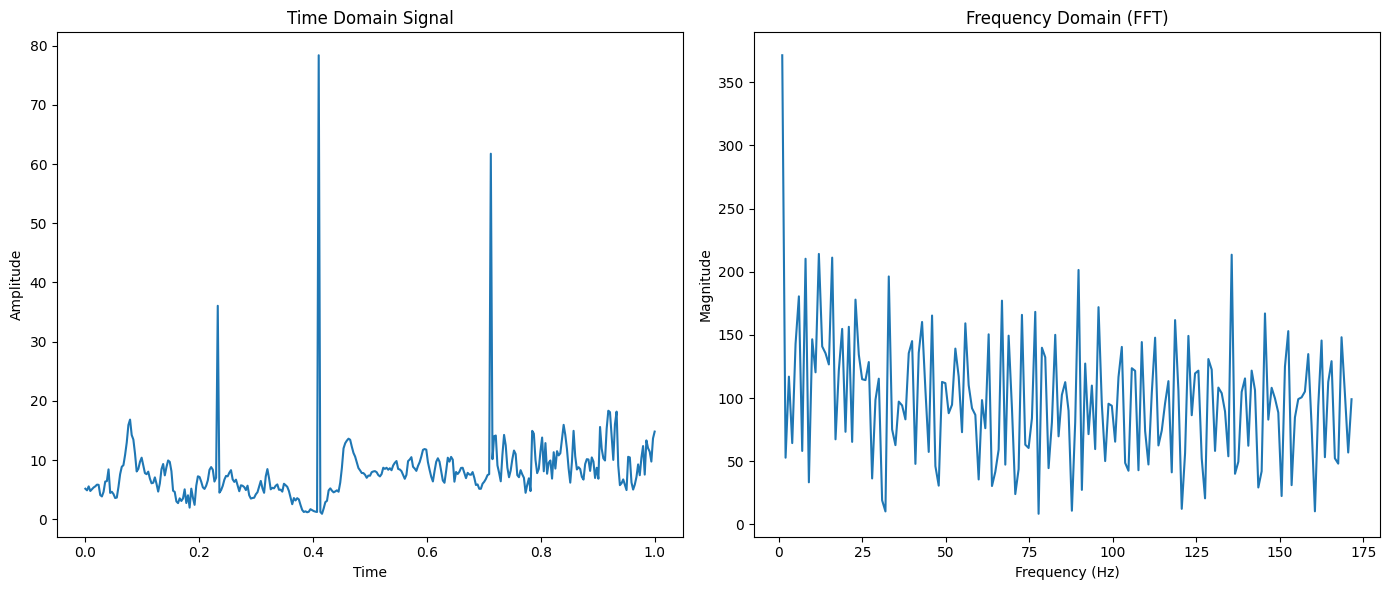

> /tmp/ipykernel_3306605/3309264687.py(41)<module>()
     39         import ipdb;ipdb.set_trace()
     40 
---> 41         total_num += 1



ipdb>  c


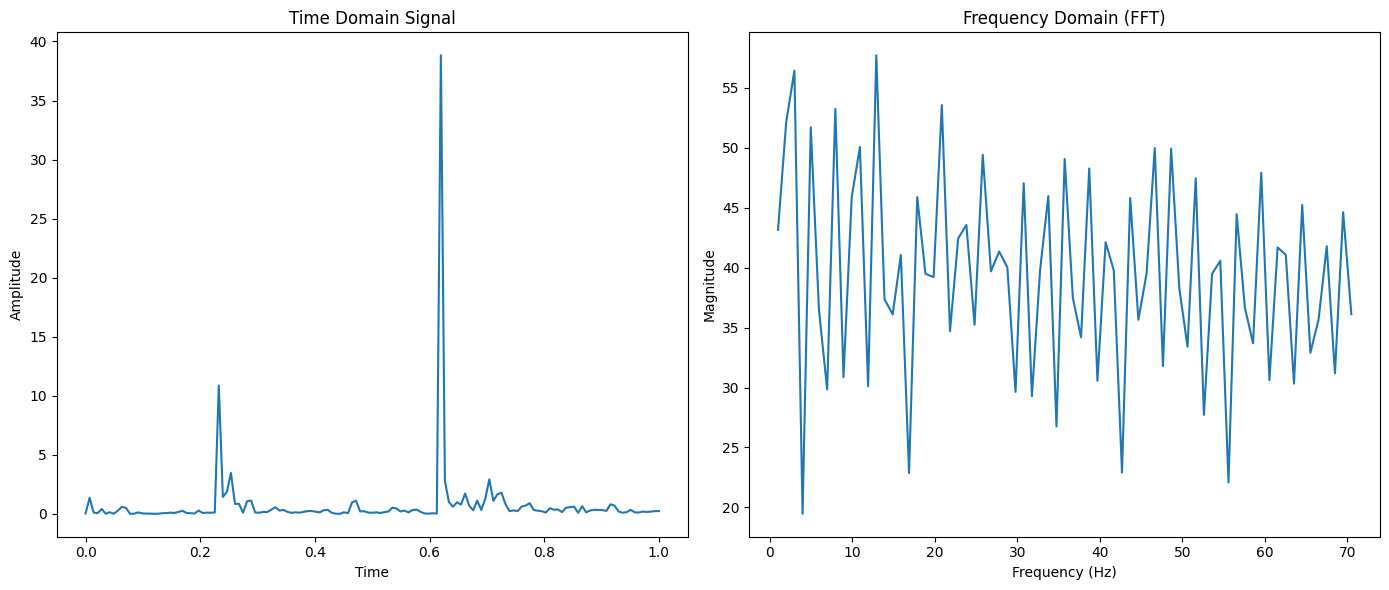

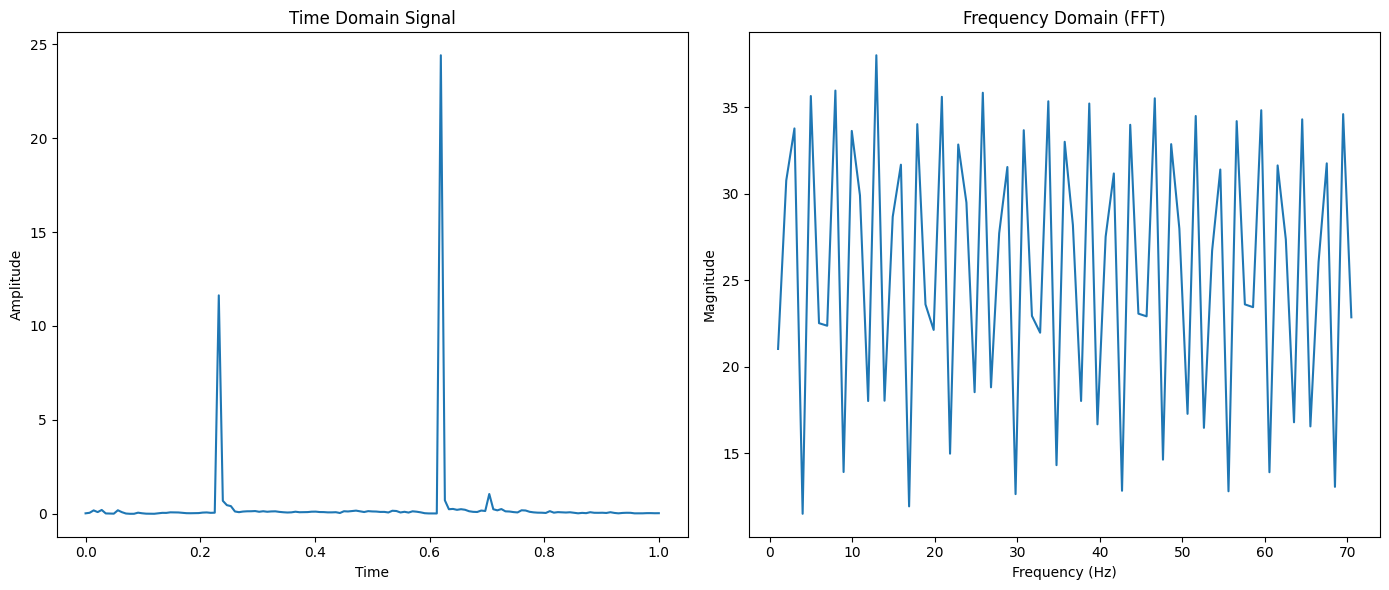

> /tmp/ipykernel_3306605/3309264687.py(41)<module>()
     39         import ipdb;ipdb.set_trace()
     40 
---> 41         total_num += 1



ipdb>  c


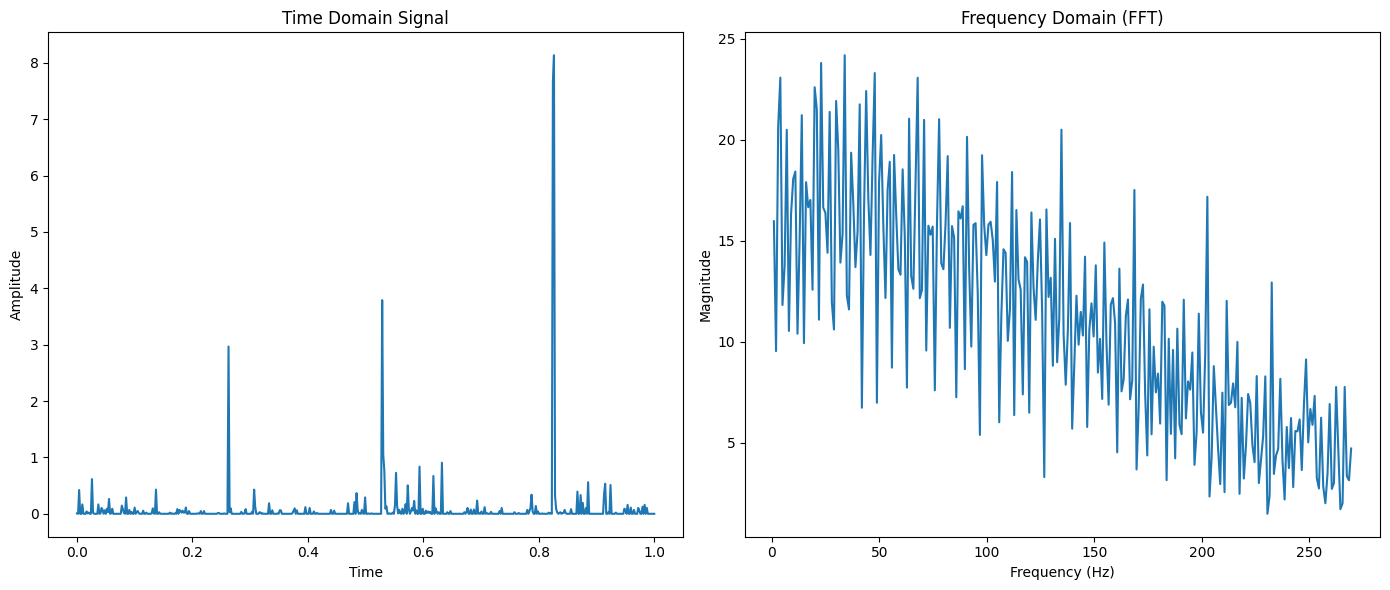

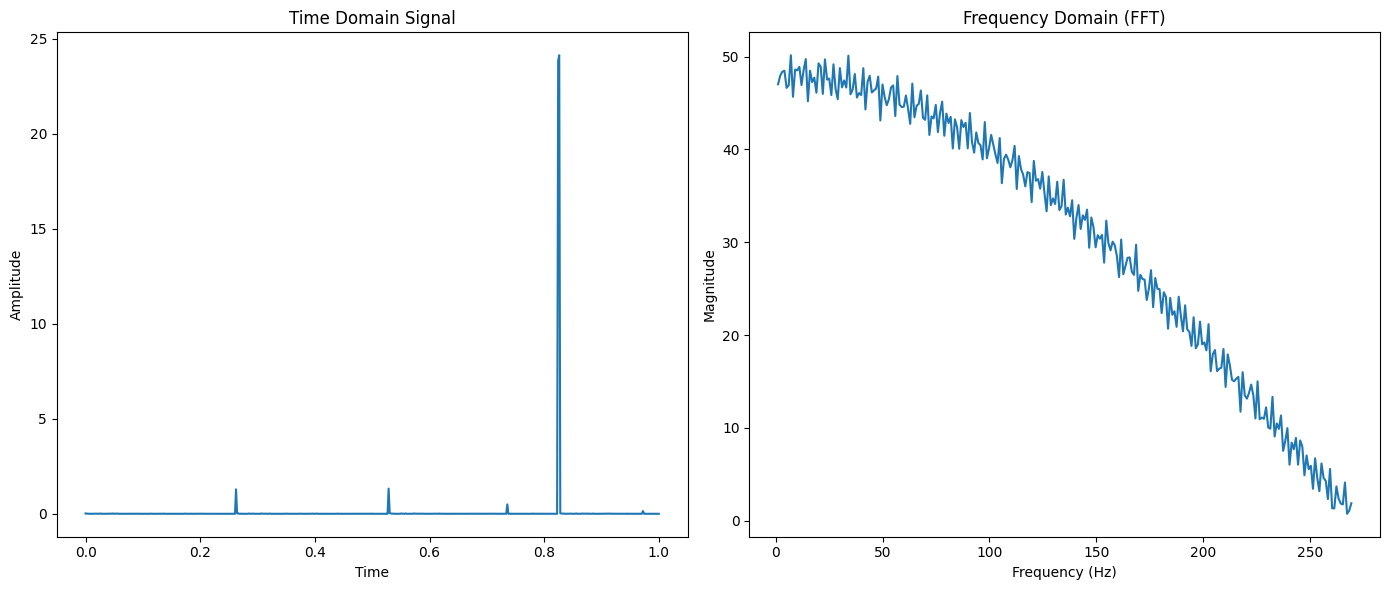

> /tmp/ipykernel_3306605/3309264687.py(41)<module>()
     39         import ipdb;ipdb.set_trace()
     40 
---> 41         total_num += 1



ipdb>  c


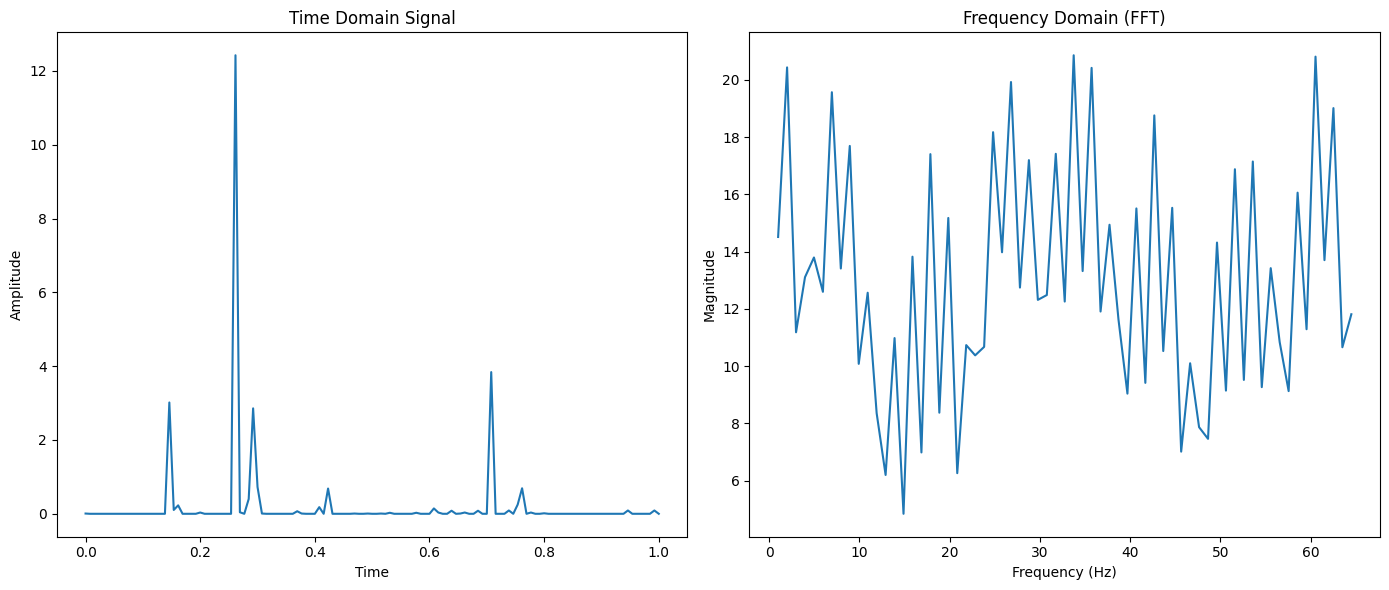

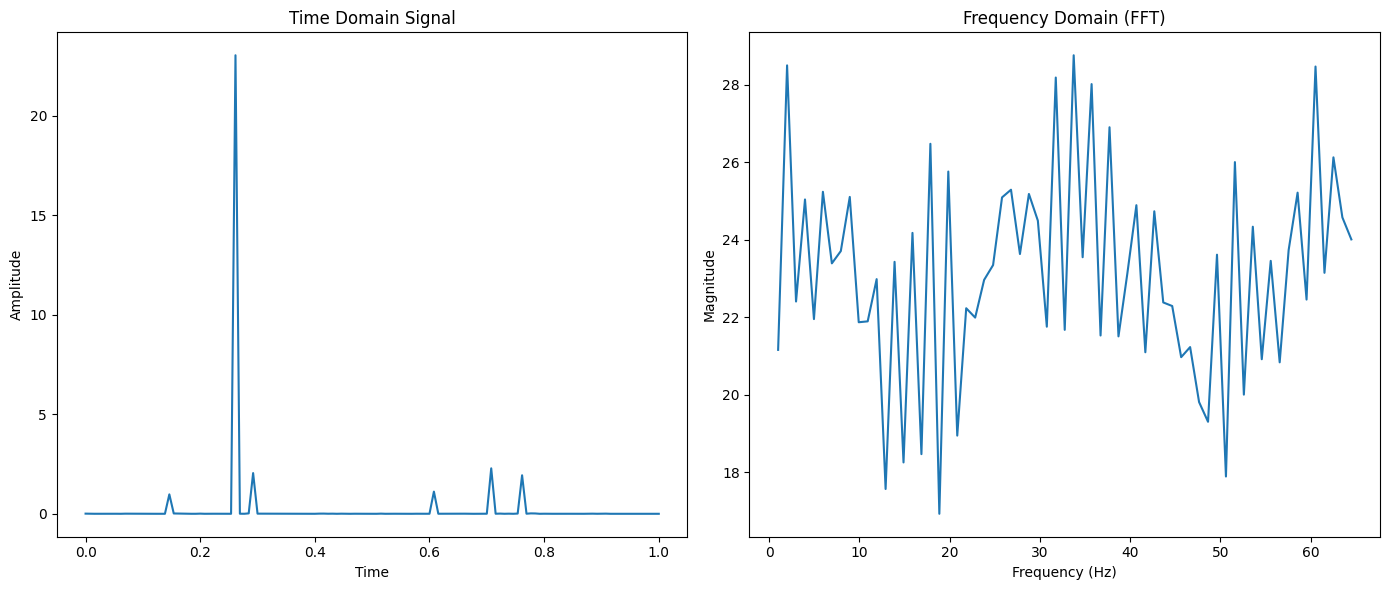

> /tmp/ipykernel_3306605/3309264687.py(41)<module>()
     39         import ipdb;ipdb.set_trace()
     40 
---> 41         total_num += 1



ipdb>  c


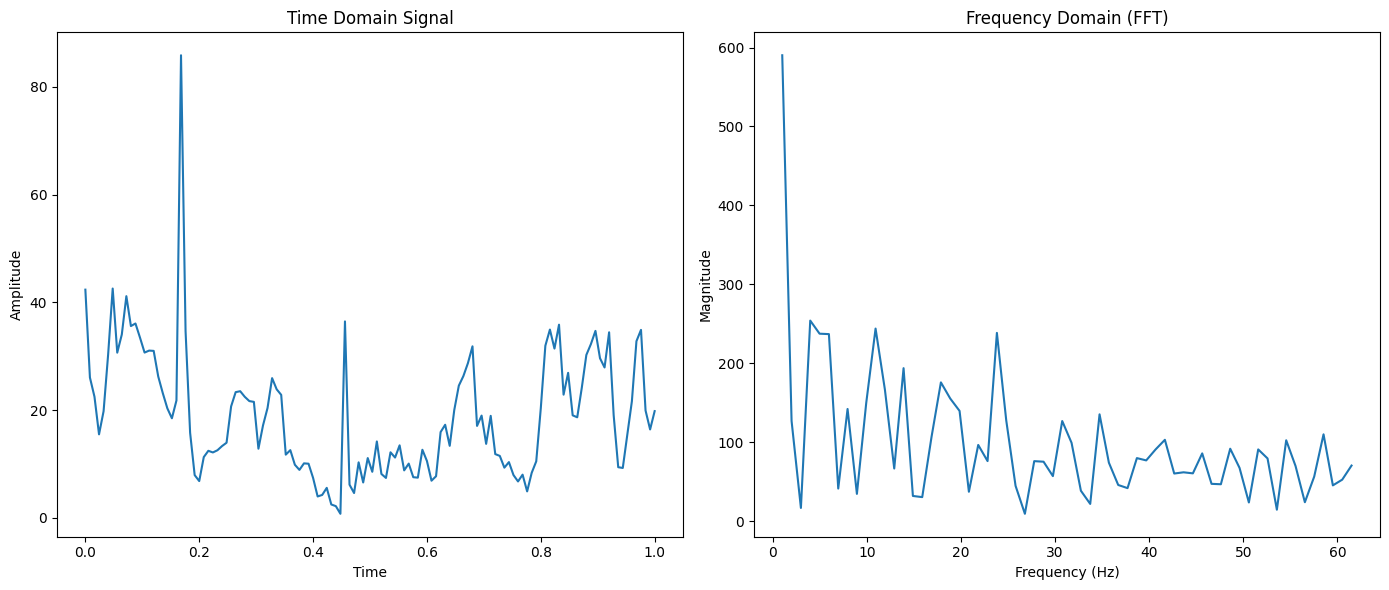

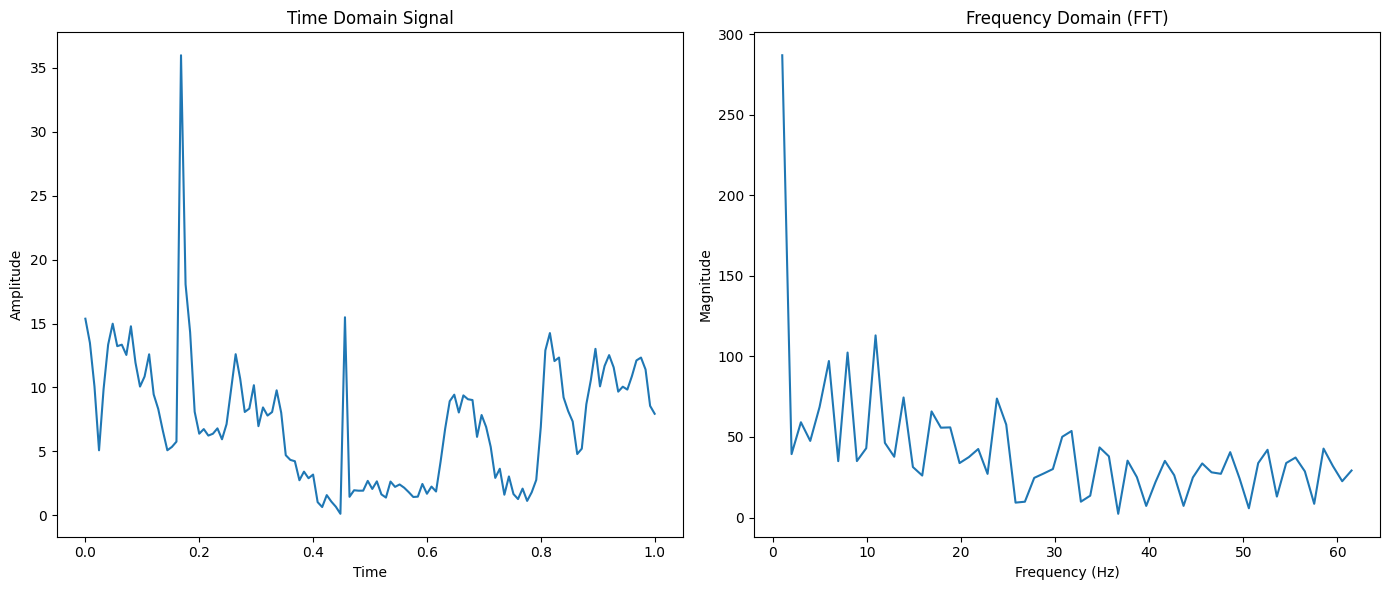

> /tmp/ipykernel_3306605/3309264687.py(41)<module>()
     39         import ipdb;ipdb.set_trace()
     40 
---> 41         total_num += 1



ipdb>  c


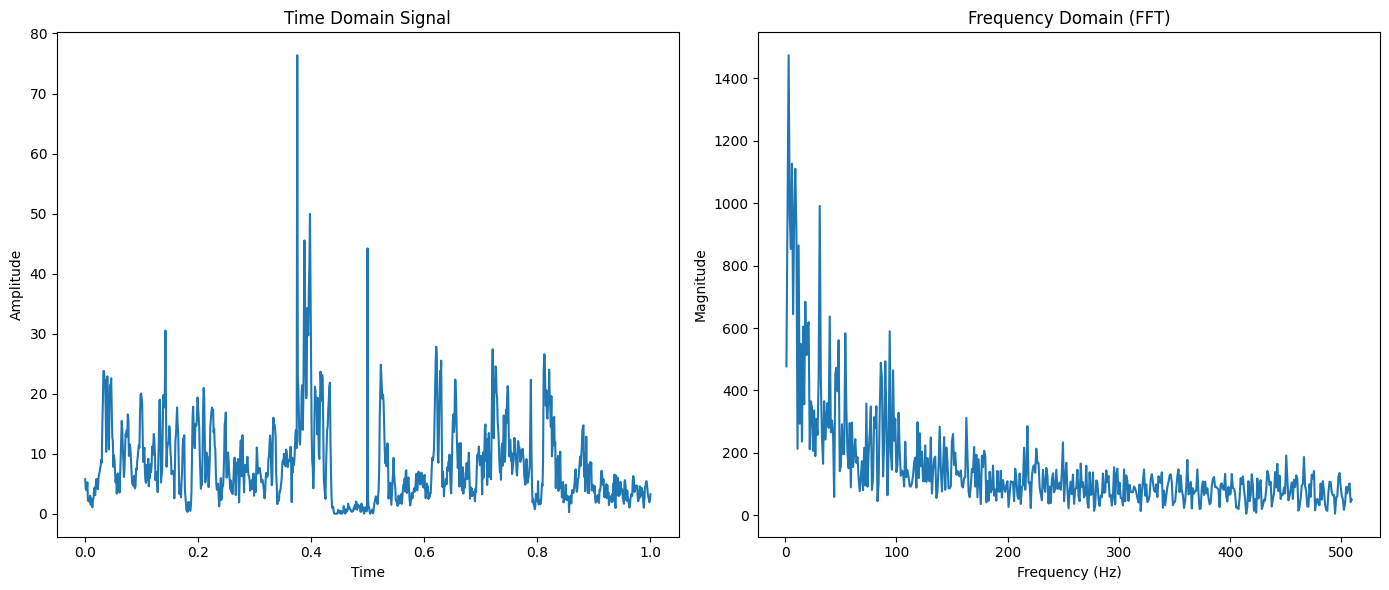

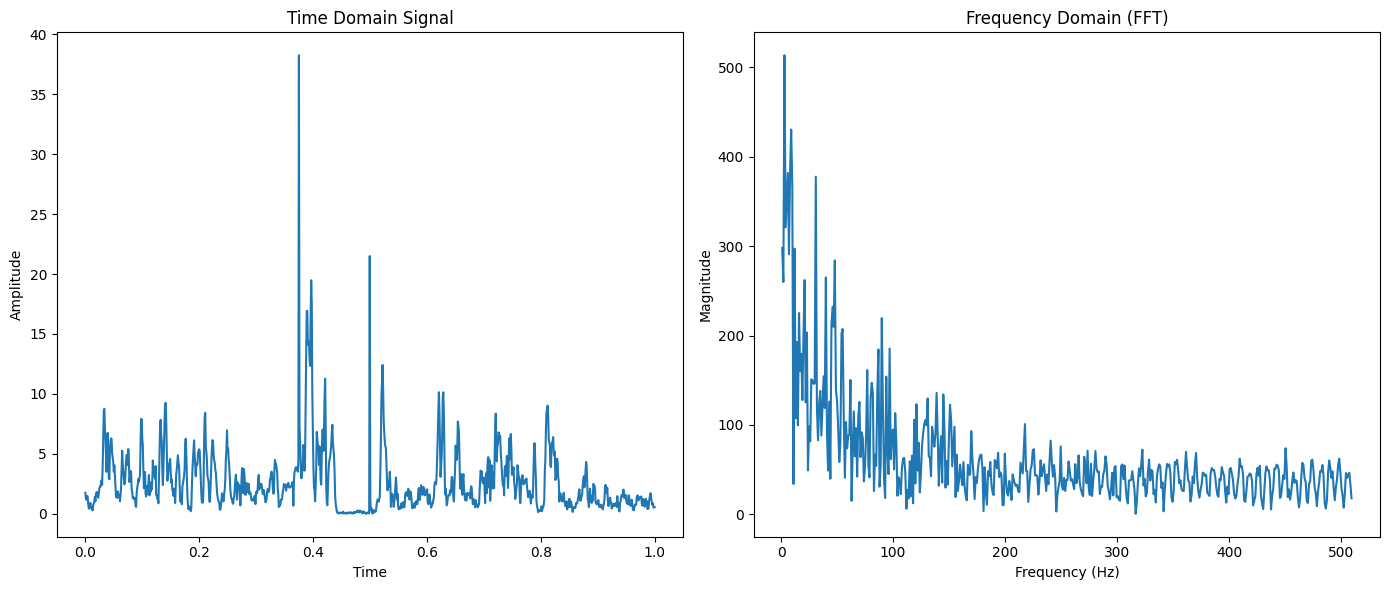

> /tmp/ipykernel_3306605/3309264687.py(41)<module>()
     39         import ipdb;ipdb.set_trace()
     40 
---> 41         total_num += 1



ipdb>  c


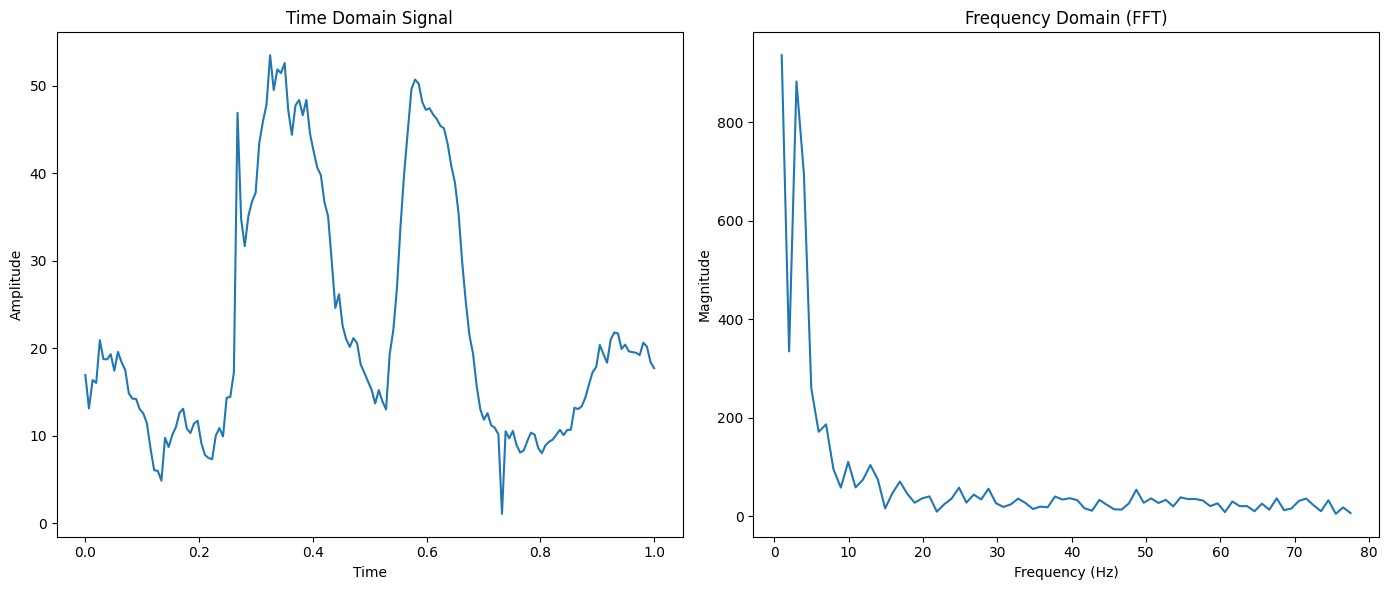

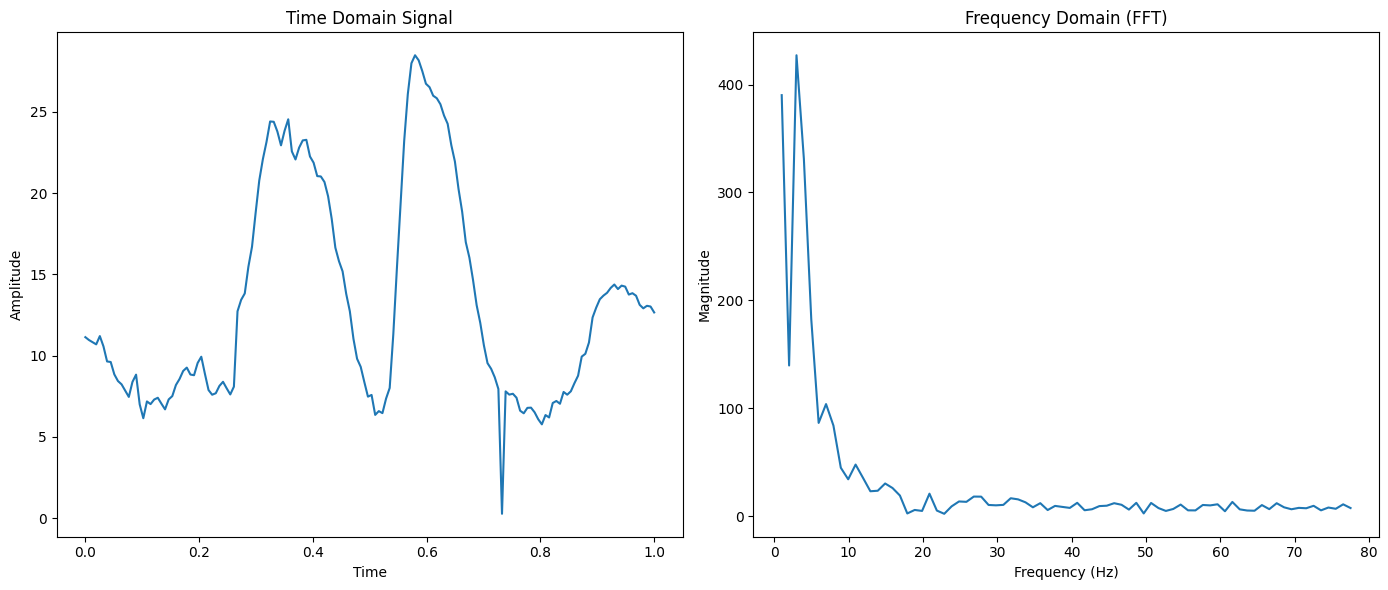

> /tmp/ipykernel_3306605/3309264687.py(41)<module>()
     39         import ipdb;ipdb.set_trace()
     40 
---> 41         total_num += 1



ipdb>  q


In [258]:
from scenedetect import detect, ContentDetector,ThresholdDetector,AdaptiveDetector,open_video,StatsManager,SceneManager
import numpy as np
from MyDetector import MyDetector as MyDetector1
import os
root_path = '/home/guangyi.liu/repo/video_process/mp4_cut'
files = os.listdir(root_path)
files.sort()

cut_list = []
static_list =[]
x_list = []
y = []
total_num = 0
for mp4_file in files:
    if '.mp4' in mp4_file[-4:]:
        # print(mp4_file)
        mp4file = os.path.join(root_path, mp4_file)
        video = open_video(mp4file)
        video.seek(1)
        stats_manager = StatsManager()
        scene_manager = SceneManager(stats_manager)
        scene_manager.add_detector(ContentDetector(threshold=27))
        scene_manager.detect_scenes(video=video)
        stats_manager._frame_metrics
        frame_keys = stats_manager._frame_metrics.keys()
        delta_edges = []
        delta_lums = []
        frame_keys = list(frame_keys)
        for jj in range(0,len(frame_keys)):
            key = frame_keys[jj]
            delta_edges.append(stats_manager._frame_metrics[key]['delta_edges'])
            delta_lums.append(stats_manager._frame_metrics[key]['delta_lum'])

        seq_edges = np.array(delta_edges)
        
        seq_lums = np.array(delta_lums)
        fft(seq_edges)
        fft(seq_lums)
        import ipdb;ipdb.set_trace()

        total_num += 1

# 异常点检测

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# 生成一个示例序列，包含一个分布突然变化的断点
np.random.seed(42)
model_ = "rbf"  # 选择RBF模型（高斯核密度）



In [252]:
from scenedetect import detect, ContentDetector,ThresholdDetector,AdaptiveDetector,open_video,StatsManager,SceneManager
import numpy as np
from MyDetector import MyDetector as MyDetector1
import os
root_path = '/home/guangyi.liu/repo/video_process/mp4_noncut'
files = os.listdir(root_path)
files.sort()

cut_list = []
static_list =[]
x_list = []
y = []
total_num = 0
for mp4_file in files:
    if '.mp4' in mp4_file[-4:]:
        # print(mp4_file)
        mp4file = os.path.join(root_path, mp4_file)
        video = open_video(mp4file)
        video.seek(1)
        stats_manager = StatsManager()
        scene_manager = SceneManager(stats_manager)
        scene_manager.add_detector(ContentDetector(threshold=27))
        scene_manager.detect_scenes(video=video)
        stats_manager._frame_metrics
        frame_keys = stats_manager._frame_metrics.keys()
        delta_edges = []
        delta_lums = []
        frame_keys = list(frame_keys)
        for jj in range(0,len(frame_keys)):
            key = frame_keys[jj]
            delta_edges.append(stats_manager._frame_metrics[key]['delta_edges'])
            delta_lums.append(stats_manager._frame_metrics[key]['delta_lum'])

        seq_edges = np.array(delta_edges)
        # 使用 ruptures 库进行断点检测
        algo_e = rpt.Pelt(model=model_).fit(seq_edges)  # PELT算法，使用RBF模型
        
        breakpoints_e = algo_e.predict(pen=np.mean(seq_edges))  # 使用惩罚值10来检测断点
        if len(breakpoints_e) == 1 and breakpoints_e[0] == len(seq_edges):
            breakpoints_e = []
        seq_lums = np.array(delta_lums)
        algo_l = rpt.Pelt(model=model_).fit(seq_lums)  # PELT算法，使用RBF模型
        breakpoints_l = algo_l.predict(pen=np.mean(seq_lums))  # 使用惩罚值10来检测断点
        if len(breakpoints_l) == 1 and breakpoints_l[0] == len(seq_lums):
            breakpoints_l = []
        print(f'{mp4_file}\t{len(breakpoints_e)}\t{len(breakpoints_l)}')

        total_num += 1

0000000_00009.mp4	2	7
0000002_00009.mp4	0	0
0000003_00004.mp4	0	9
0000007_00004.mp4	0	2
0000010_00004.mp4	0	5
0000012_00004.mp4	0	3
0000013_00004.mp4	7	15
0000014_00004.mp4	2	6
0000016_00004.mp4	0	0
0000016_00009.mp4	0	2
0000019_00004.mp4	3	4
0000020_00009.mp4	0	0
0000021_00009.mp4	0	0
0000022_00004.mp4	0	10
0000023_00004.mp4	0	0
0000024_00004.mp4	0	0


KeyboardInterrupt: 

In [210]:
from scenedetect import detect, ContentDetector,ThresholdDetector,AdaptiveDetector,open_video,StatsManager,SceneManager
import numpy as np
from MyDetector import MyDetector as MyDetector1
import os
root_path = '/home/guangyi.liu/repo/video_process/mp4_cut'
files = os.listdir(root_path)
files.sort()

cut_list = []
static_list =[]
x_list = []
y = []
total_num = 0
for mp4_file in files:
    if '.mp4' in mp4_file[-4:]:
        # print(mp4_file)
        mp4file = os.path.join(root_path, mp4_file)
        video = open_video(mp4file)
        video.seek(1)
        stats_manager = StatsManager()
        scene_manager = SceneManager(stats_manager)
        scene_manager.add_detector(ContentDetector(threshold=27))
        scene_manager.detect_scenes(video=video)
        stats_manager._frame_metrics
        frame_keys = stats_manager._frame_metrics.keys()
        delta_edges = []
        delta_lums = []
        frame_keys = list(frame_keys)
        for jj in range(0,len(frame_keys)):
            key = frame_keys[jj]
            delta_edges.append(stats_manager._frame_metrics[key]['delta_edges'])
            delta_lums.append(stats_manager._frame_metrics[key]['delta_lum'])

        seq_edges = np.array(delta_edges)
        # 使用 ruptures 库进行断点检测
        algo_e = rpt.Pelt(model=model_).fit(seq_edges)  # PELT算法，使用RBF模型
        
        breakpoints_e = algo_e.predict(pen=np.mean(seq_edges)+np.std(seq_edges))  # 使用惩罚值10来检测断点
        if len(breakpoints_e) == 1 and breakpoints_e[0] == len(seq_edges):
            breakpoints_e = []
        seq_lums = np.array(delta_lums)
        algo_l = rpt.Pelt(model=model_).fit(seq_lums)  # PELT算法，使用RBF模型
        breakpoints_l = algo_l.predict(pen=np.mean(seq_lums)+np.std(seq_lums))  # 使用惩罚值10来检测断点
        if len(breakpoints_l) == 1 and breakpoints_l[0] == len(seq_lums):
            breakpoints_l = []
        print(f'{mp4_file}\t{len(breakpoints_e)}\t{len(breakpoints_l)}')

        total_num += 1

0000000_00004.mp4	0	0
0000001_00004.mp4	0	0
0000001_00009.mp4	0	2
0000002_00004.mp4	3	6
0000004_00004.mp4	42	15
0000004_00009.mp4	0	0
0000005_00004.mp4	0	0
0000005_00009.mp4	4	13
0000007_00009.mp4	0	0
0000009_00004.mp4	7	20
0000009_00009.mp4	2	2
0000011_00009.mp4	0	0
0000013_00009.mp4	2	2
0000017_00004.mp4	7	9
0000018_00004.mp4	10	26
0000018_00009.mp4	3	6
0000020_00004.mp4	0	0
0000021_00004.mp4	0	13
0000023_00009.mp4	2	2
0000028_00004.mp4	0	2


[h264 @ 0x5927500] mmco: unref short failure
[h264 @ 0x5927500] mmco: unref short failure
[h264 @ 0x5927500] mmco: unref short failure
[h264 @ 0x5927500] mmco: unref short failure


0000028_00009.mp4	0	0
0000029_00004.mp4	2	4
0000029_00009.mp4	0	0
0000030_00009.mp4	0	0
0000036_00009.mp4	0	2
0000039_00004.mp4	0	4
0000043_00004.mp4	8	32
0000045_00009.mp4	0	0
0000046_00004.mp4	2	2
0000049_00004.mp4	0	0
0000049_00009.mp4	0	2
0000050_00009.mp4	0	0
0000052_00004.mp4	0	4
0000052_00009.mp4	0	3
0000054_00004.mp4	0	2
0000058_00009.mp4	0	3


In [207]:
np.mean(seq_lums)

5.379950972716684

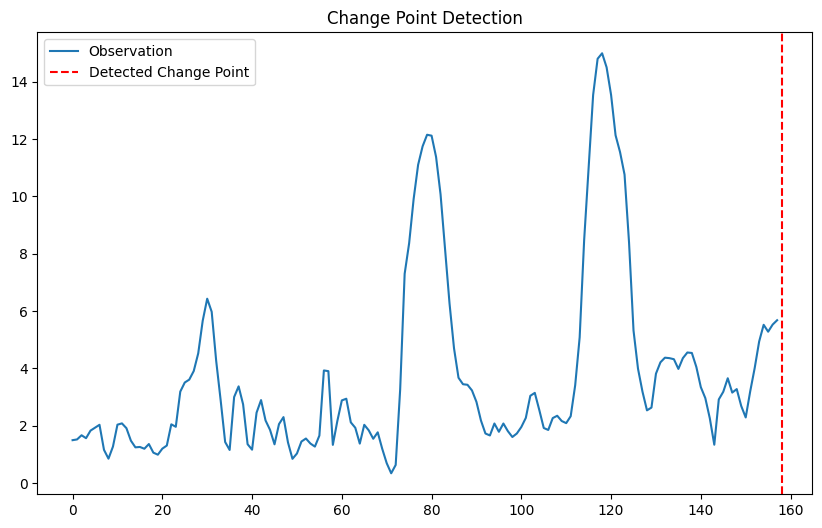

Detected breakpoints: [158]


In [200]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# 生成一个示例序列，包含一个分布突然变化的断点
np.random.seed(42)

sequence = np.array(delta_lums)
# 使用 ruptures 库进行断点检测
model = "rbf"  # 选择RBF模型（高斯核密度）
algo = rpt.Pelt(model=model).fit(sequence)  # PELT算法，使用RBF模型
breakpoints = algo.predict(pen=15)  # 使用惩罚值10来检测断点

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(sequence, label="Observation")
for bp in breakpoints:
    plt.axvline(x=bp, color='red', linestyle='--', label="Detected Change Point" if bp == breakpoints[0] else "")
plt.title("Change Point Detection")
plt.legend()
plt.show()


print("Detected breakpoints:", breakpoints)


In [192]:
breakpoints

[158]

In [193]:
len(sequence)

158

In [102]:
import numpy as np

# 假设有 5 个样本，每个样本有 4 个浮点数特征
X = np.array(x_list)
y = np.array(y)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 假设 X 是你的输入特征，y 是标签
# 将数据分为训练集和测试集
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)


# # 假设 X 和 y 已经准备好
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 创建并训练逻辑回归模型
model = LogisticRegression(class_weight={0: 1, 1: 2})
model.fit(X_train, y_train)

# # 预测测试集
# y_pred = model.predict(X_test1)

# 获取模型对测试集的预测概率
y_prob = model.predict_proba(X_test1)[:, 1]

# 调整阈值，例如使用 0.7 而不是 0.5
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)



# 计算准确率
accuracy = accuracy_score(y_test1, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")
from sklearn.metrics import precision_score, recall_score

# 假设 y_test1 是真实标签，y_pred 是模型预测的标签
# 计算精确率
precision = precision_score(y_test1, y_pred)

# 计算召回率
recall = recall_score(y_test1, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Test set accuracy: 0.8125
Precision: 0.5000
Recall: 1.0000


In [103]:
y_test1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [104]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [105]:
root_path = '/home/guangyi.liu/repo/video_process/no_classified'
files = os.listdir(root_path)
files.sort()
import os
cut_list = []
static_list =[]
x_test = []
# y_test = []
results_list = {'mp4':[],'de_mean':[],'de_std':[],'dl_mean':[],'dl_std':[]}
for mp4_file in files:
    if '.mp4' in mp4_file[-4:]:
        # print(mp4_file)
        mp4file = os.path.join(root_path, mp4_file)
        video = open_video(mp4file)
        video.seek(1)
        stats_manager = StatsManager()
        scene_manager = SceneManager(stats_manager)
        # scene_manager.auto_downscale=True
        # scene_manager.downscale = 1
        scene_manager.add_detector(ContentDetector(threshold=27))
        
        scene_manager.detect_scenes(video=video)
        stats_manager._frame_metrics
        frame_keys = stats_manager._frame_metrics.keys()
        delta_edges = []
        delta_lums = []
        for key in frame_keys:
            delta_edges.append(stats_manager._frame_metrics[key]['delta_edges'])
            delta_lums.append(stats_manager._frame_metrics[key]['delta_lum'])
        de_mean = np.mean(delta_edges)
        de_std = np.std(delta_edges)
        dl_mean = np.mean(delta_lums)
        dl_std = np.std(delta_lums)
        de_upper_bound = max(de_mean + 4.7 * de_std, 3.* de_mean)
        dl_upper_bound = max(dl_mean + 5* dl_std, 3.* dl_mean)
        total_cut_de = np.sum(np.array(delta_edges) > de_upper_bound )
        total_cut_dl = np.sum(np.array(delta_lums) > dl_upper_bound   )
        results_list['mp4'].append(mp4_file)
        results_list['de_mean'].append(round(de_mean,2))
        results_list['dl_mean'].append(round(dl_mean,2))
        results_list['de_std'].append(round(de_std,2))
        results_list['dl_std'].append(round(dl_std,2))
        print(mp4_file,'\n\t',round(de_mean,2),round(de_std,2),round(de_upper_bound,2),round(np.max(delta_edges),2),'\t\t',round(dl_mean,2),round(dl_std,2),round(dl_upper_bound),round(np.max(delta_lums),2))
        x_test.append([de_mean,de_std,np.max(delta_edges), dl_mean, dl_std, np.max(delta_lums)])
        # y_test.append(1)
        if dl_mean < .5 and dl_std < 0.5 :
            static_list.append(mp4_file)
        elif de_mean < 0.6 and de_std < 0.6:
            static_list.append(mp4_file)
        if total_cut_de> 0 or total_cut_dl >0 or (dl_mean > 9 and dl_std>9) :
            cut_list.append(mp4_file)
        stats_manager.save_to_csv(f'{root_path}/{mp4_file}.csv')
print(len(cut_list),cut_list)

0000061_00004.mp4 
	 16.9 12.8 77.07 93.05 		 3.03 3.95 23 23.9
0000062_00004.mp4 
	 17.82 10.42 66.8 38.54 		 5.07 2.83 19 9.5
0000062_00009.mp4 
	 9.82 6.78 41.7 52.38 		 0.75 0.47 3 1.56
0000065_00004.mp4 
	 4.32 3.25 19.58 14.69 		 1.36 1.14 7 5.37
0000066_00004.mp4 
	 2.44 1.0 7.32 8.91 		 0.73 0.32 2 3.08
0000067_00004.mp4 
	 46.01 18.79 138.02 97.76 		 21.46 8.11 64 45.0
0000067_00009.mp4 
	 32.29 3.2 96.86 36.25 		 6.22 1.11 19 7.92
0000068_00004.mp4 
	 3.62 3.93 22.11 25.54 		 1.89 2.04 12 11.14
0000068_00009.mp4 
	 3.54 2.86 16.96 11.8 		 2.54 2.1 13 8.25
0000069_00004.mp4 
	 22.54 10.74 73.02 50.25 		 8.71 4.21 30 21.47
0000069_00009.mp4 
	 11.56 3.72 34.67 24.64 		 5.28 1.96 16 11.18
0000070_00004.mp4 
	 19.08 8.09 57.25 48.03 		 6.5 3.54 24 17.49
0000070_00009.mp4 
	 4.94 1.43 14.81 10.72 		 1.29 0.44 4 3.18
0000071_00004.mp4 
	 1.45 3.18 16.41 66.25 		 0.62 1.78 10 25.21
0000071_00009.mp4 
	 1.63 5.6 27.93 116.61 		 0.7 2.6 14 39.08
0000072_00004.mp4 
	 14.96 8.24 53.69 5

In [113]:
import numpy as np

# 假设有 5 个样本，每个样本有 4 个浮点数特征
X = np.array(x_list)
y = np.array(y)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_test = np.array(x_test)


# 预测测试集
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
for i,file in enumerate(results_list['mp4']):
    print(file,y_pred[i],round(y_prob[i],2))

0000061_00004.mp4 1 0.86
0000062_00004.mp4 0 0.3
0000062_00009.mp4 0 0.42
0000065_00004.mp4 0 0.32
0000066_00004.mp4 0 0.24
0000067_00004.mp4 0 0.3
0000067_00009.mp4 0 0.0
0000068_00004.mp4 1 0.5
0000068_00009.mp4 0 0.26
0000069_00004.mp4 0 0.31
0000069_00009.mp4 0 0.15
0000070_00004.mp4 0 0.16
0000070_00009.mp4 0 0.16
0000071_00004.mp4 1 0.93
0000071_00009.mp4 1 1.0
0000072_00004.mp4 1 0.62
0000072_00009.mp4 0 0.0
0000073_00004.mp4 1 0.97
0000073_00009.mp4 0 0.0
0000074_00004.mp4 0 0.26
0000074_00009.mp4 0 0.19
0000077_00004.mp4 0 0.21
0000078_00004.mp4 0 0.18
0000078_00009.mp4 0 0.07
0000083_00004.mp4 1 0.85
0000085_00004.mp4 1 0.57
0000086_00004.mp4 1 0.52
0000087_00004.mp4 1 0.99
0000087_00009.mp4 0 0.23
0000088_00004.mp4 0 0.35
0000088_00009.mp4 0 0.27
0000089_00004.mp4 1 0.75
0000089_00009.mp4 1 1.0
0000090_00004.mp4 1 0.73
0000090_00009.mp4 0 0.26
0000091_00004.mp4 0 0.22
0000092_00004.mp4 0 0.15
0000097_00004.mp4 0 0.27
0000097_00009.mp4 0 0.44
0000098_00004.mp4 0 0.36
0000098_

In [54]:
results_list['mp4']

['0000061_00004.mp4',
 '0000062_00004.mp4',
 '0000062_00009.mp4',
 '0000065_00004.mp4',
 '0000066_00004.mp4',
 '0000067_00004.mp4',
 '0000067_00009.mp4',
 '0000068_00004.mp4',
 '0000068_00009.mp4',
 '0000069_00004.mp4',
 '0000069_00009.mp4',
 '0000070_00004.mp4',
 '0000070_00009.mp4',
 '0000071_00004.mp4',
 '0000071_00009.mp4',
 '0000072_00004.mp4',
 '0000072_00009.mp4',
 '0000073_00004.mp4',
 '0000073_00009.mp4',
 '0000074_00004.mp4',
 '0000074_00009.mp4',
 '0000077_00004.mp4',
 '0000078_00004.mp4',
 '0000078_00009.mp4',
 '0000083_00004.mp4',
 '0000085_00004.mp4',
 '0000086_00004.mp4',
 '0000087_00004.mp4',
 '0000087_00009.mp4',
 '0000088_00004.mp4',
 '0000088_00009.mp4',
 '0000089_00004.mp4',
 '0000089_00009.mp4',
 '0000090_00004.mp4',
 '0000090_00009.mp4',
 '0000091_00004.mp4',
 '0000092_00004.mp4',
 '0000097_00004.mp4',
 '0000097_00009.mp4',
 '0000098_00004.mp4',
 '0000098_00009.mp4',
 '0000099_00004.mp4',
 '0000099_00009.mp4']

In [81]:
static_list

['22GRZ7ih-mQ_2.mp4', '22Nc43oY0Ng_2.mp4', '22pBN04LBz4_2.mp4']

In [75]:
set(results_list['mp4'])- set(static_list) - set(cut_list)

{'114iopCPWKk_0.mp4',
 '11DFBNgL5lc_2.mp4',
 '11GLHBfciaA_2.mp4',
 '11HXe7pymh8_0.mp4',
 '11HXe7pymh8_1.mp4',
 '11HXe7pymh8_2.mp4',
 '11HjRq-A3ow_1.mp4',
 '11YUkJCf6_w_2.mp4',
 '11fLImeUZ2w_0.mp4',
 '11fLImeUZ2w_1.mp4',
 '11igmz4iZrg_1.mp4',
 '11mhs3qdQk0_2.mp4',
 '11ssCPxWDaY_2.mp4',
 '11vajpsGDMc_1.mp4'}

In [67]:
cut_cnt=0
no_cut_cnt = 0
len_nocut = len(nocut_)
len_cut = len(cut_)
for cut_mp4 in cut_:
    if cut_mp4 in cut_list:
        cut_cnt+=1
print(f'cut: {cut_cnt}/{len_cut}')

for no_cut_mp4 in nocut_:
    if no_cut_mp4 in cut_list:
        no_cut_cnt+=1
        print(no_cut_mp4)
print(f'correct no cut: {len_nocut-no_cut_cnt}/{len_nocut}')

cut: 21/21
11I5Qvkl3CQ_1.mp4
11DFBNgL5lc_1.mp4
correct no cut: 8/10


In [13]:
import os
# root_path = '/home/guangyi.liu/world_model/ipynb/panda_samples_aes'  # for cut-video
# root_path = '/home/guangyi.liu/world_model/ipynb/panda_samples_aes/cut'  # for non-cut video
# root_path = '/home/guangyi.liu/world_model/ipynb/panda_samples_aes/noncut'  # for non-cut video
# root_path = '/home/guangyi.liu/shared-folder/datasets/guangyi_data/scripts/panda70m/samples_fewer'
# root_path = '/home/guangyi.liu/repo/video_process/mp4_file'
root_path ='/home/guangyi.liu/shared-folder/datasets/guangyi_data/MiraData'
files = os.listdir(root_path)
files.sort()
cut_list = []
static_list =[]
# results_list = {'mp4':[],'de_mean':[],'de_std':[],'dl_mean':[],'dl_std':[]}
for mp4_file in files:
    if '.mp4' in mp4_file[-4:]:
        # print(mp4_file)
        mp4file = os.path.join(root_path, mp4_file)
        video = open_video(mp4file)
        video.seek(1)
        stats_manager = StatsManager()
        scene_manager = SceneManager(stats_manager)
        # scene_manager.auto_downscale=True
        # scene_manager.downscale = 1
        scene_manager.add_detector(MyDetector1(threshold=[61.66, 38.847722996346846]))
        
        scene_manager.detect_scenes(video=video)
        stats_manager._frame_metrics
        frame_keys = stats_manager._frame_metrics.keys()
        # delta_edges = []
        # delta_lums = []
        # for key in frame_keys:
        #     delta_edges.append(stats_manager._frame_metrics[key]['delta_edges'])
        #     delta_lums.append(stats_manager._frame_metrics[key]['delta_lum'])
        # de_mean = np.mean(delta_edges)
        # de_std = np.std(delta_edges)
        # dl_mean = np.mean(delta_lums)
        # dl_std = np.std(delta_lums)
        # de_upper_bound = max(de_mean + 5.5 * de_std, 3* de_mean)
        # dl_upper_bound = max(dl_mean + 5.5* dl_std, 3* dl_mean)
        # total_cut_de = np.sum(np.array(delta_edges) > de_upper_bound )
        # total_cut_dl = np.sum(np.array(delta_lums) > dl_upper_bound   )
        # results_list['mp4'].append(mp4_file)
        # results_list['de_mean'].append(round(de_mean,2))
        # results_list['dl_mean'].append(round(dl_mean,2))
        # results_list['de_std'].append(round(de_std,2))
        # results_list['dl_std'].append(round(dl_std,2))
        # print(mp4_file,round(de_mean,2),round(de_std,2),de_upper_bound,round(np.max(delta_edges),2),'\t',round(dl_mean,2),round(dl_std,2),dl_upper_bound,round(np.max(delta_lums),2))
        # if dl_mean < 0.7 and dl_std < 0.3:
        #     static_list.append(mp4_file)
        # elif de_mean < 1.5 and de_std < 1.5:
        #     static_list.append(mp4_file)
        # if total_cut_de> 0 or total_cut_dl >0:
        #     cut_list.append(mp4_file)
        # stats_manager.save_to_csv(f'./mp4_file/{mp4_file}.csv')
        # print(mp4_file,total_cut>0)
        # if mp4_file =='4.6.mp4':
        #     break
        # [3.99,4.03,4.12,4.27,4.53,4.8,4.81,4.97,5.07]
# 15 ['3.72.mp4', '3.83.mp4',  '4.37.mp4', '4.6.mp4',  '4.83.mp4', '4.86.mp4']
print(len(cut_list),cut_list)

[61.66, 38.847722996346846]
0 []


In [14]:
scene_list = scene_manager.get_scene_list()

In [24]:
scene_list[0][0]

00:00:00.033 [frame=1, fps=29.970]

In [14]:
cut_flag = (np.array(delta_edges) > de_upper_bound) | (np.array(delta_lums) > dl_upper_bound)
cut_pos = []
for i in range(len(cut_flag)):
    if cut_flag[i]:
        cut_pos.append(i)

In [76]:
from datetime import datetime,timedelta
skip_duration = timedelta(seconds=0.5)
start_skip = timedelta(seconds=1.5)
video_name = 'test_new'
time_format = '%H:%M:%S.%f'
for i, timecode_ in enumerate(scene_list):
    timecode = [None,None]
    timecode[0] = timecode_[0].get_timecode()
    timecode[1] = timecode_[1].get_timecode()
    if i == 0:
        start_time = datetime.strptime(timecode[0], time_format) + skip_duration + start_skip
    else:
        start_time = datetime.strptime(timecode[0], time_format) + skip_duration
    end_time = datetime.strptime(timecode[1], time_format) - skip_duration
    timecode[0] = start_time.strftime(time_format)
    video_duration = (end_time - start_time).total_seconds()
    if video_duration < 2:
        print('skip')
        continue
    os.system("ffmpeg -hide_banner -loglevel panic -ss %s -t %.3f -i %s %s"%(timecode[0], video_duration, video_path, os.path.join('mp4_file', video_name+".%i.mp4"%i)))


skip
skip
skip
skip
skip
skip
skip
skip
skip


In [61]:
test= datetime.strptime(timecode[0], '%H:%M:%S.%f') + skip_duration

In [71]:
time_format = '%H:%M:%S.%f'

In [72]:
test.strftime(time_format)

'01:02:20.040020'

In [53]:
one_second

datetime.timedelta(microseconds=20)

In [38]:
stats_manager.get_metrics(2,['delta_edges'])

[28.457845052083332]

In [51]:
dl_mean + 5.5 * dl_std

79.91106163101028

In [41]:
stats_manager.save_to_csv(

['4.12.mp4', '4.5.mp4', '4.76.mp4', '4.77.mp4', '5.27.mp4']

In [32]:
for i in range(len(results_list['mp4'])):
    if results_list['de_mean'][i] < 1.5:
        print(results_list['mp4'][i], results_list['de_mean'][i],results_list['de_std'][i])

4.12.mp4 0.23 1.14
4.5.mp4 1.29 1.03
4.76.mp4 1.35 0.41
4.77.mp4 1.04 0.86


In [31]:
for i in range(len(results_list['mp4'])):
    if results_list['dl_mean'][i] < 1.:
        print(results_list['mp4'][i], results_list['dl_mean'][i],results_list['dl_std'][i] )

4.12.mp4 0.06 0.31
4.5.mp4 0.29 0.24
4.6.mp4 0.67 1.23
4.76.mp4 0.58 0.18
4.77.mp4 0.14 0.04
4.83.mp4 0.65 0.45
5.27.mp4 0.55 0.19


In [35]:
for i in range(len(results_list['mp4'])):
    if results_list['dl_mean'][i] > results_list['dl_std'][i] and results_list['dl_mean'][i] < 1.:
        print(results_list['mp4'][i], results_list['dl_mean'][i],results_list['dl_std'][i] )

4.5.mp4 0.29 0.24
4.76.mp4 0.58 0.18
4.77.mp4 0.14 0.04
4.83.mp4 0.65 0.45
5.27.mp4 0.55 0.19


In [27]:
results_list['dl_mean'][-1]

0.55

In [2]:
from scenedetect import detect, ContentDetector,open_video,StatsManager,SceneManager
import numpy as np
def detect_cut(mp4file):
    video = open_video(mp4file)
    video.seek(1) #  the first frame may give large delta_edge value, start from the second frame
    stats_manager = StatsManager()
    scene_manager = SceneManager(stats_manager)
    scene_manager.add_detector(ContentDetector())
    scene_manager.detect_scenes(video=video)
    frame_keys = stats_manager._frame_metrics.keys()  # read metrics
    delta_edges = []
    delta_lums = []
    for key in frame_keys:
        delta_edges.append(stats_manager._frame_metrics[key]['delta_edges'])
        delta_lums.append(stats_manager._frame_metrics[key]['delta_lum'])
    de_mean = np.mean(delta_edges)
    de_std = np.std(delta_edges)
    dl_mean = np.mean(delta_lums)
    dl_std = np.std(delta_lums)
    de_upper_bound = max(de_mean + 5.5 * de_std, 3* de_mean)
    dl_upper_bound = max(dl_mean + 5.5 * dl_std, 3* dl_mean)
    total_cut_de = np.sum(np.array(delta_edges) > de_upper_bound )
    total_cut_dl = np.sum(np.array(delta_lums) > dl_upper_bound )
    return total_cut_de> 0 or total_cut_dl >0 # if True, there is a cut, ignore this sample

/home/guangyi.liu/.conda/envs/llava/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import os
# root_path = '/home/guangyi.liu/world_model/ipynb/panda_samples_aes'  # for cut-video
# root_path = '/home/guangyi.liu/world_model/ipynb/panda_samples_aes/cut'  # for non-cut video
# root_path = '/home/guangyi.liu/world_model/ipynb/panda_samples_aes/noncut'  # for non-cut video
root_path = '/home/guangyi.liu/shared-folder/datasets/guangyi_data/kinetics-dataset/k600_targz/train/bobsledding'
files = os.listdir(root_path)
files.sort()
cut_list = []
import time
start = time.time()
from tqdm import tqdm
out_list=[]
for mp4_file in tqdm(files,total=len(files)):
    if '.mp4' in mp4_file:
        # print(mp4_file)
        mp4file = os.path.join(root_path, mp4_file)
        res = detect_cut(mp4file)
        if res:
            out_list.append(mp4_file)
        #     print(mp4_file)

print(time.time()-start)
# [3.99,4.03,4.12,4.27,4.53,4.8,4.81,4.97,5.07]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 550/550 [03:43<00:00,  2.46it/s]

223.59946084022522


In [4]:
from streaming import StreamingDataset

In [11]:
print(len(out_list)/len(files))

0.33454545454545453


In [5]:
dataset = StreamingDataset(remote = '/home/guangyi.liu/shared-folder/datasets/panda70m_streaming_all_2s_10s_2xframe_ofm1.5_cutnum_aes4.75_forcaption_gpt_v3_cut')

In [6]:
len(dataset)

627481